In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import os

In [2]:
dirpath = os.getcwd()
kp_model_path = os.path.join(os.path.normpath(dirpath + os.sep + os.pardir), "teat_keypoints")
kp_predictions = pd.read_csv(os.path.join(kp_model_path, "keypoint_test_predictions.csv"))
sg_model_path = os.path.join(os.path.normpath(dirpath + os.sep + os.pardir), "udder_segment")
sg_predictions = pd.read_csv(os.path.join(sg_model_path, "segment_test_predictions.csv"))

In [3]:
df = kp_predictions[['filename','edn_lf', 'edn_rf', 'edn_lr', 'edn_rr']]
df2 = pd.melt(df, id_vars = 'filename', value_vars =['edn_lf', 'edn_rf', 'edn_lr', 'edn_rr'] )

In [4]:
labels = ["left front", "right front", "left rear", "right rear"]
vals = df[['edn_lf', 'edn_rf', 'edn_lr', 'edn_rr']]
 

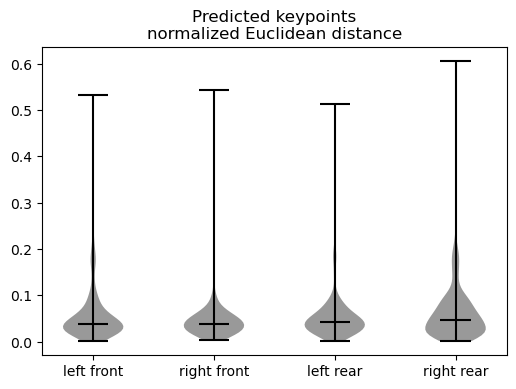

In [7]:
fig, ax = plt.subplots(figsize=(6, 4))
parts = ax.violinplot(vals, showextrema=True, showmedians=True)
ax.set_xticks([1,2,3,4])
ax.set_xticklabels(labels)

ax.set_title('Predicted keypoints\nnormalized Euclidean distance')
for pc in parts['bodies']:
    pc.set_facecolor('gray')
    pc.set_alpha(0.8)

for partname in ('cbars', 'cmins', 'cmaxes',  'cmedians'):
    vp = parts[partname]
    vp.set_edgecolor("black")

plt.savefig("keypoints.png")

KeyError: 'bodies'

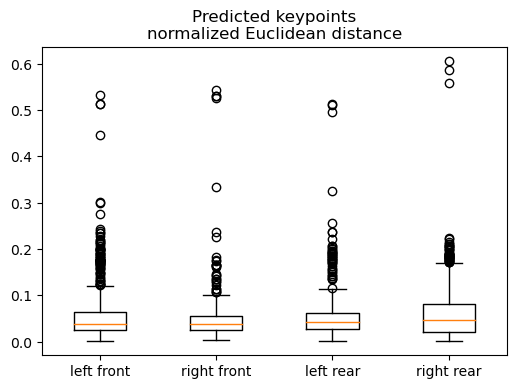

In [9]:
fig, ax = plt.subplots(figsize=(6, 4))
parts = ax.boxplot(vals)
ax.set_xticks([1,2,3,4])
ax.set_xticklabels(labels)

ax.set_title('Predicted keypoints\nnormalized Euclidean distance')
for pc in parts['bodies']:
    pc.set_facecolor('gray')
    pc.set_alpha(0.8)

for partname in ('cbars', 'cmins', 'cmaxes',  'cmedians'):
    vp = parts[partname]
    vp.set_edgecolor("black")

#plt.savefig("keypoints.png")

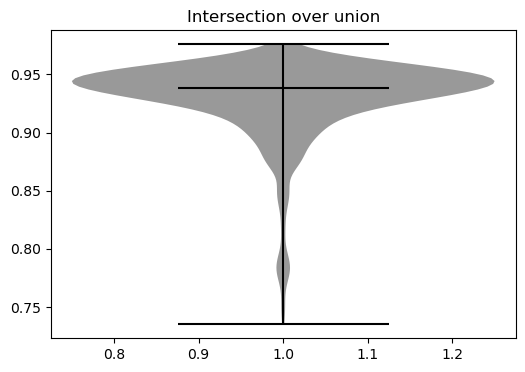

In [6]:
fig, ax = plt.subplots(figsize=(6, 4))
parts = ax.violinplot(sg_predictions["intersection_union"], showextrema=True, showmedians=True)

for pc in parts['bodies']:
    pc.set_facecolor('gray')
    pc.set_alpha(0.8)

for partname in ('cbars', 'cmins', 'cmaxes',  'cmedians'):
    vp = parts[partname]
    vp.set_edgecolor("black")

ax.set_title('Intersection over union')

fig.savefig("segments.png")